# Análisis y Predicción de Precios de Autos (Core)



Objetivo

Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

Descripción del Dataset:

Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.


https://www.kaggle.com/datasets/toramky/automobile-dataset



# Parte 1: **Análisis Exploratorio de Datos (EDA)**

## 1) Carga y Exploración de Datos:
- Cargar el dataset y revisar la estructura básica.
- Descripción de las variables y su distribución.
- Detección y tratamiento de valores nulos.
- Identificación y tratamiento de outliers.
- Análisis de correlación entre variables.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df = pd.read_csv('/content/2_Core_Automobile_data.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [164]:
df.info()

# No parecen haber datos nulos, además la mayoría de las variables son categóricas y algunas son enteros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [165]:
df.describe().round(2)

# Según observado con cuantiles, min, max, media y variación, se deberían revisar las variables:
# curb-weight, engine-size, compression-ratio, city-mpg, highway-mpg
# posibles outliers?

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,25.22,30.75
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,3.97,6.54,6.89
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,13.00,16.00
25%,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,19.00,25.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,24.00,30.00
75%,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,30.00,34.00
max,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,49.00,54.00


In [166]:
# prompt: imprimir valores únicos de cada columna y el tipo de dato de la columna

for col in df.columns:
  print(f"\nColumna: {col}")
  print(f"\nValores únicos: {df[col].unique()}")
  print(f"\nTipo de dato: {df[col].dtype}")
  print("-" * 20)


Columna: symboling

Valores únicos: [ 3  1  2  0 -1 -2]

Tipo de dato: int64
--------------------

Columna: normalized-losses

Valores únicos: ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

Tipo de dato: object
--------------------

Columna: make

Valores únicos: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Tipo de dato: object
--------------------

Columna: fuel-type

Valores únicos: ['gas' 'diesel']

Tipo de dato: object
--------------------

Columna: aspiration

Valores únicos: ['std' 'turbo']

Tipo de dato: object
--------------------

Columna: num-of-doors



In [167]:
df.isnull().sum()

# Se verificó y no hay nulos

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [168]:
df.duplicated().sum()

# No hay duplicados

0

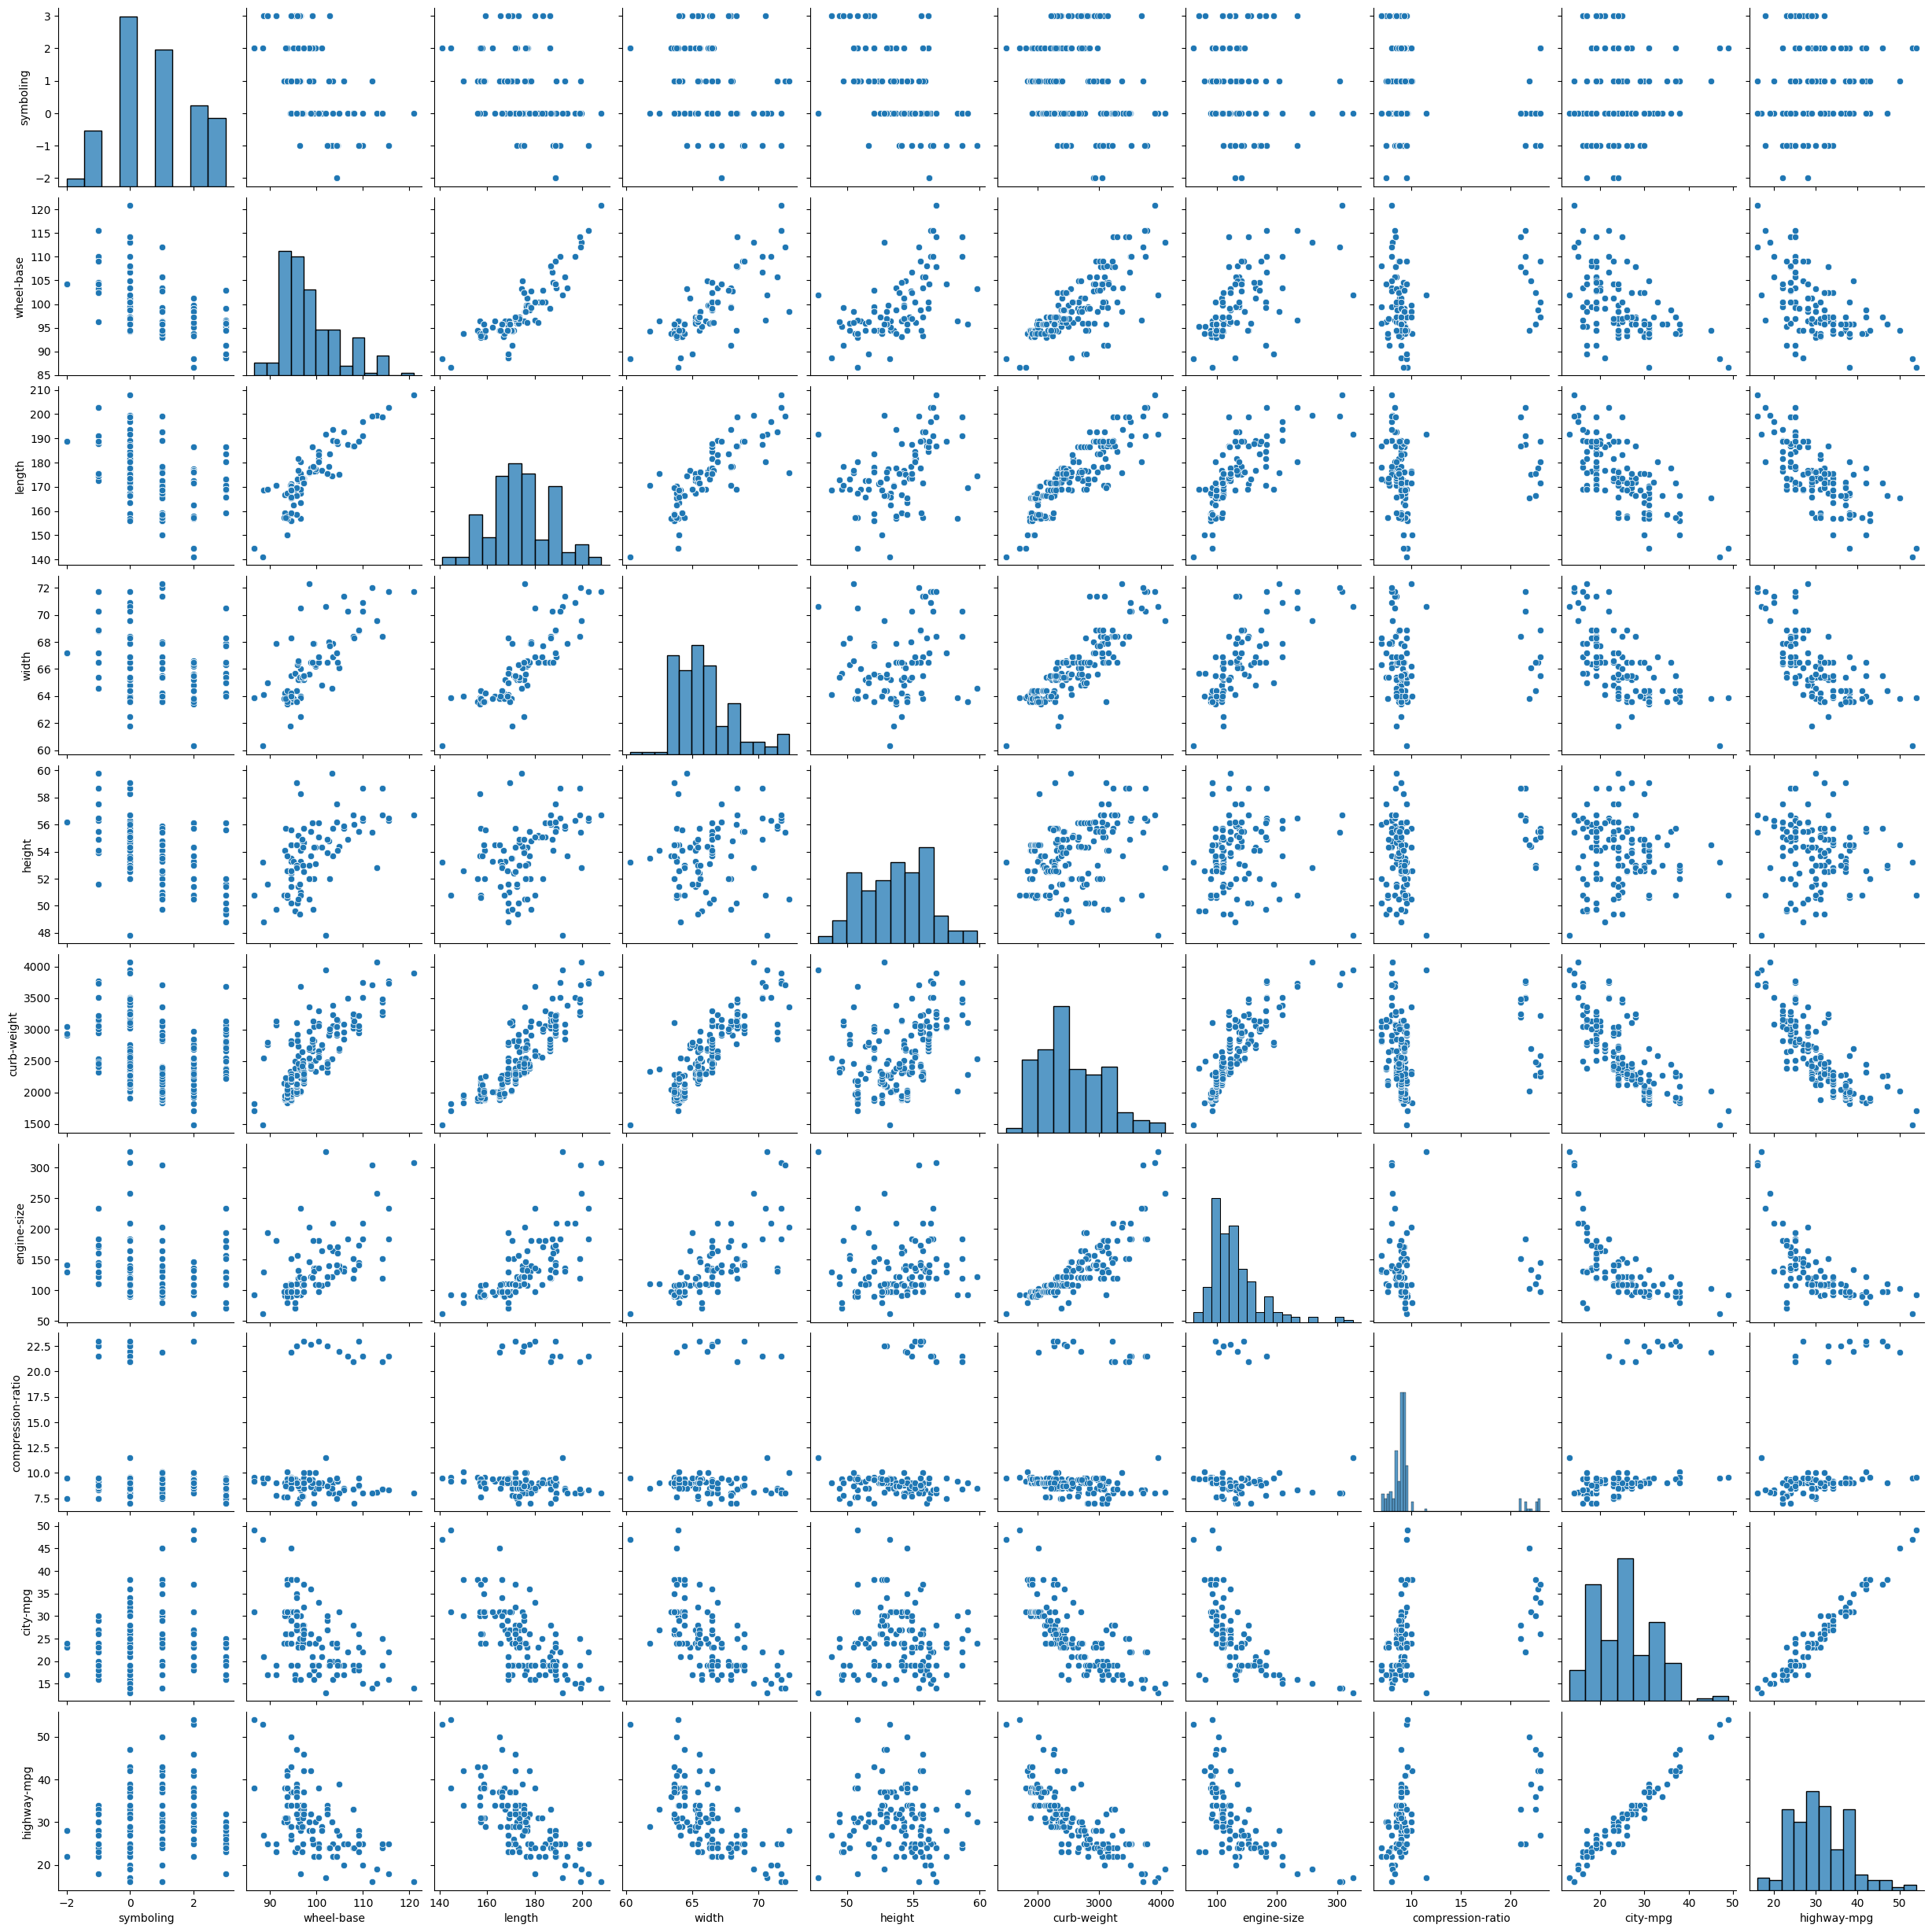

In [169]:
sns.pairplot(data=df)

Cómo price no aparece, se debió revisar el porqué, y es que esta variable es tipo object, y al intentar realizarse la transformación a float, se encontró un error, y es que hay valores = "?" lo cual impide dicha transformación...

Al revisar los valores únicos, esto sucede en otras variables, así que se procede, primero a revisar por encima, y se encontraron 4 variables: normalized-losses, num-of-doors, peak-rpm, price... Pero me pareció más práctico convertir este valor en nulos y poder revisar de mejor manera

Se verificaron duplicados y no habían, aún después de las operaciones siguientes

In [170]:
# Reemplazar '?' por nulos en todo el DataFrame
df.replace('?', np.nan, inplace=True)

# Calcular el porcentaje de nulos diferente de cero para cada columna
porcentaje_nulos = ((df.isnull().sum() / len(df)) * 100).round(2)

# Mostrar el porcentaje de nulos diferente de cero
print(porcentaje_nulos[porcentaje_nulos != 0])

normalized-losses    20.00
num-of-doors          0.98
bore                  1.95
stroke                1.95
horsepower            0.98
peak-rpm              0.98
price                 1.95
dtype: float64


In [173]:
# Eliminar la columna 'normalized-losses'
df.drop(columns=['normalized-losses'], inplace=True)

# Se eliminó porque desconozco este tipo de mercado y buscando no encontré algo que hiciera relación o me diera
# razón para imputarlo, además, al revisar que es un tipo texto y no numérico, y que además los valores únicos
# parecen no tener ningún patrón o escala, sino ser más bien códigos de algún tipo, se elimina la columna

In [174]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Determinar la cantidad de datos restantes
df.info()

# Por practicidad eliminé los nulos, ya que estos eran pocos, y de 205 entradas quedaron 193 (94%)

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    int64  
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non-null

In [175]:
# Cambiar tipo de dato de price, primero a un numérico sin errores
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Segundo convertir el tipo de dato a float
df['price'] = df['price'].astype('float64')

In [176]:
# Dos variables que están como entero, son características que no pueden "variar" facilmente, así que me pareció
# mas práctico dejarlas como objetos

df['curb-weight'] = df['curb-weight'].astype('object')
df['engine-size'] = df['engine-size'].astype('object')
df['city-mpg'] = df['city-mpg'].astype('object')
df['highway-mpg'] = df['highway-mpg'].astype('object')

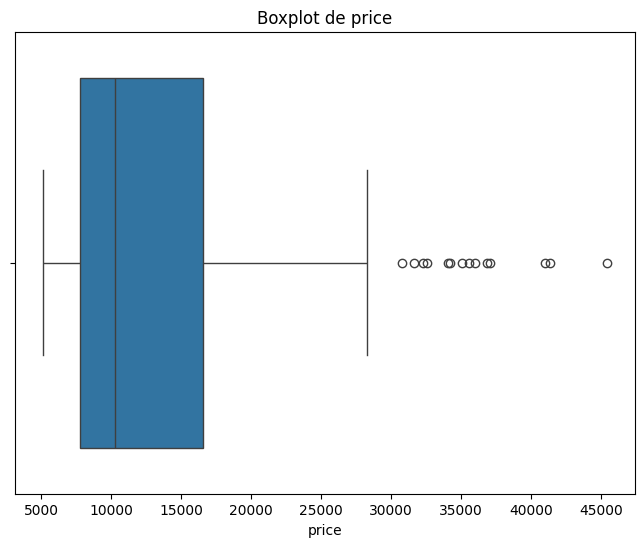

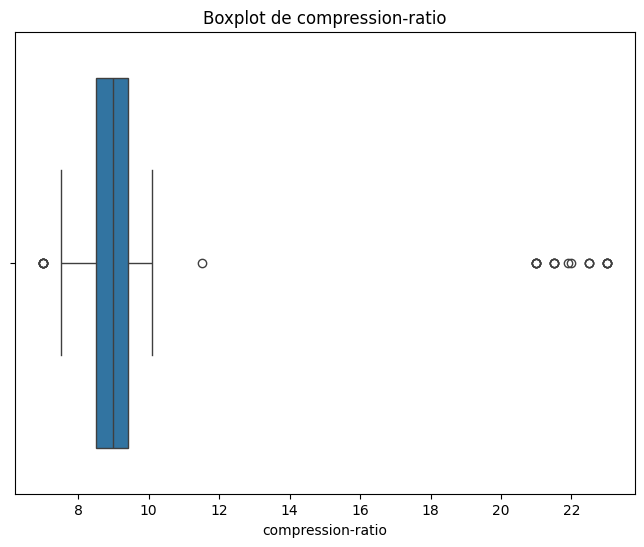

In [177]:
# Lista de las columnas para las que se desean generar boxplots y revisar gráficamente outliers
col_outliers = ['price', 'compression-ratio']

# Iterar sobre la lista de columnas y generar un boxplot para cada una
for col in col_outliers:
    plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}') # Agregar título al gráfico
    plt.xlabel(col) # Agregar etiqueta al eje x
    plt.show()

In [178]:
# Transformar las variables float para corregir outliers y no eliminarlos, aunque debería revisarse en el modelado
df['log_price'] = np.log1p(df['price'])
df['log_com-ratio'] = np.log1p(df['compression-ratio'])

# para devolver el valor de price np.expm1(df['log_price'])

<Axes: xlabel='log_price'>

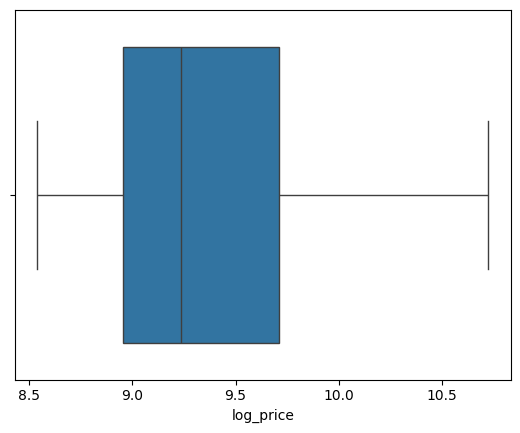

In [179]:
sns.boxplot(x=df['log_price'])

In [181]:
# Codificación de variables categóricas a selección posible
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = [
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'engine-type',
    'num-of-cylinders',
    'fuel-system',
    'horsepower',
    'peak-rpm',
    'curb-weight',
    'engine-size',
    'city-mpg',
    'highway-mpg'
]

# Aplicar LabelEncoder a todas las columnas
for column in columns_to_encode:
    df[f'{column}_Codificado'] = le.fit_transform(df[column])


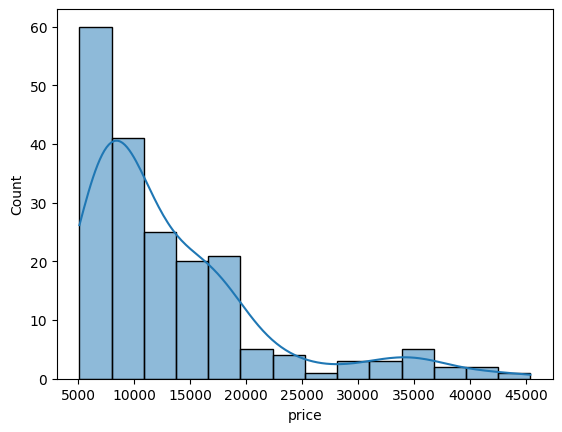

In [182]:
# Revisar distribución de variable y
sns.histplot(df['price'], kde=True)
plt.show()

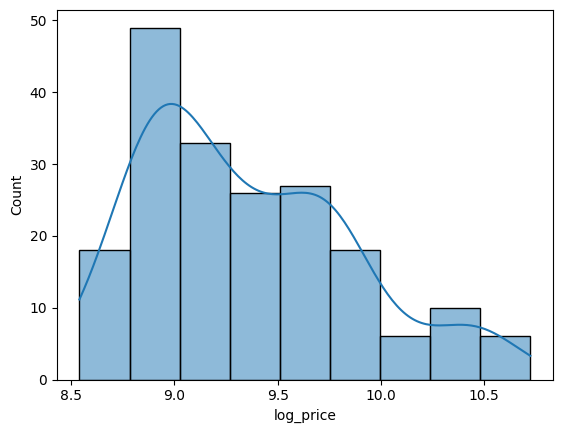

In [183]:
# Revisar distribución de variable y transformada
sns.histplot(df['log_price'], kde=True)
plt.show()

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   symboling                    193 non-null    int64  
 1   make                         193 non-null    object 
 2   fuel-type                    193 non-null    object 
 3   aspiration                   193 non-null    object 
 4   num-of-doors                 193 non-null    object 
 5   body-style                   193 non-null    object 
 6   drive-wheels                 193 non-null    object 
 7   engine-location              193 non-null    object 
 8   wheel-base                   193 non-null    float64
 9   length                       193 non-null    float64
 10  width                        193 non-null    float64
 11  height                       193 non-null    float64
 12  curb-weight                  193 non-null    object 
 13  engine-type              

In [185]:
# Crear una copia del DataFrame original
df_copia = df.copy()

# Lista de columnas a eliminar
columnas_a_eliminar = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
                       'fuel-system', 'horsepower', 'peak-rpm', 'curb-weight', 'engine-size',
                       'city-mpg', 'highway-mpg']

# Eliminar las columnas del DataFrame copia
df_copia = df_copia.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame copia sin las columnas eliminadas
df_copia

,symboling,wheel-base,length,width,height,bore,stroke,compression-ratio,price,log_price,...,engine-location_Codificado,engine-type_Codificado,num-of-cylinders_Codificado,fuel-system_Codificado,horsepower_Codificado,peak-rpm_Codificado,curb-weight_Codificado,engine-size_Codificado,city-mpg_Codificado,highway-mpg_Codificado
0,3,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0,9.510149,...,0,0,2,4,5,9,88,16,8,10
1,3,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0,9.711176,...,0,0,2,4,5,9,88,16,8,10
2,1,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0,9.711176,...,0,4,3,4,19,9,111,25,6,9
3,2,99.8,176.6,66.2,54.3,3.19,3.4,10.0,13950.0,9.543306,...,0,2,2,4,2,15,66,9,11,13
4,2,99.4,176.6,66.4,54.3,3.19,3.4,8.0,17450.0,9.767152,...,0,2,1,4,8,15,112,19,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0,9.731869,...,0,2,2,4,7,14,121,21,10,11
201,-1,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0,9.854612,...,0,2,2,4,22,13,131,21,6,8
202,-1,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0,9.975157,...,0,4,3,4,13,15,125,30,5,6
203,-1,109.1,188.8,68.9,55.5,3.01,3.4,23.0,22470.0,10.019981,...,0,2,3,2,3,7,146,22,13,10


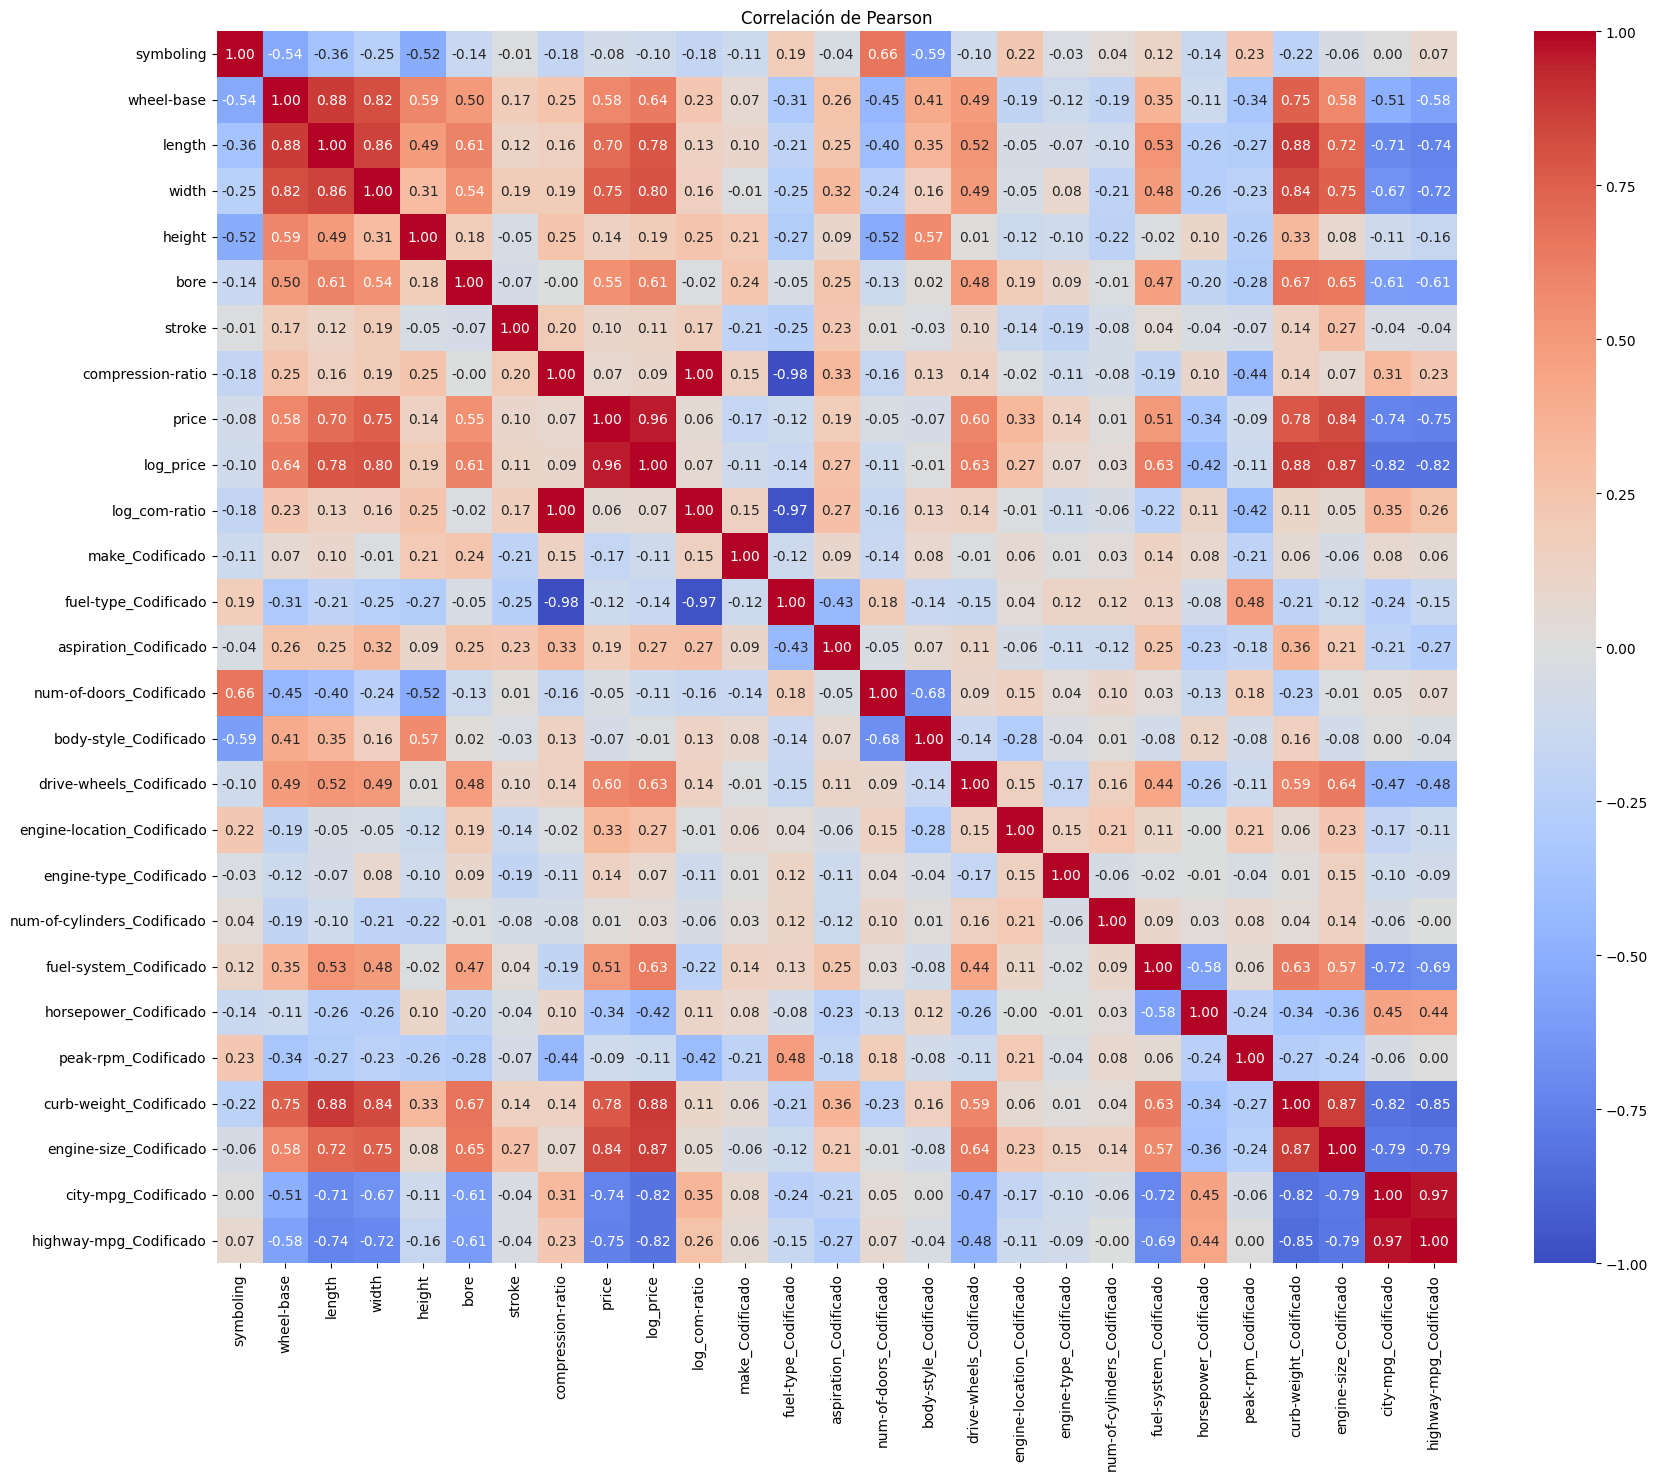

In [186]:
# Matriz de correlación inicial
correlation_matrix_spearman = df_copia.corr(method='pearson')

plt.figure(figsize=(20, 16))
plt.title('Correlación de Pearson')
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

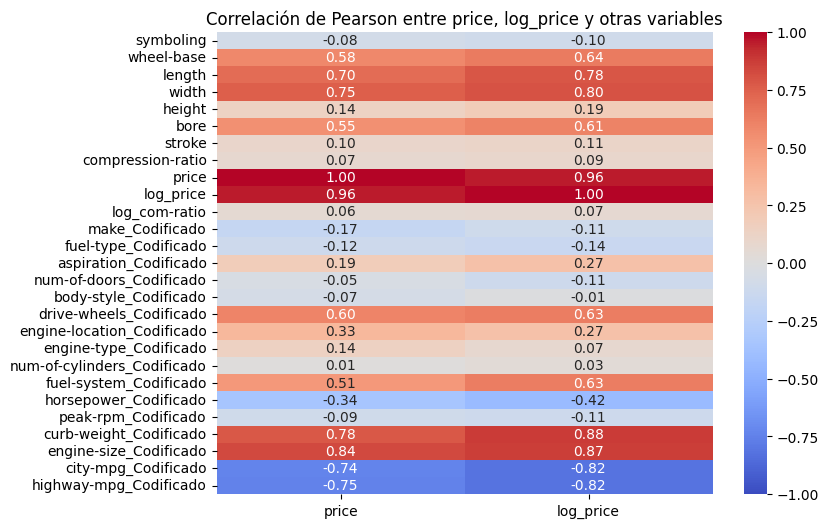

In [187]:
# Calcular la matriz de correlación de Pearson para todo el DataFrame
correlation_matrix = df_copia.corr(method='pearson')

# Seleccionar solo las filas y columnas de interés con 'price' y 'log_price'
correlation_matrix_filtered = correlation_matrix[['price', 'log_price']]

# Visualización de la correlación
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
plt.title('Correlación de Pearson entre price, log_price y otras variables')
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [188]:
correlations_price = df_copia.corr(method='pearson')['price'].sort_values(ascending=False)
print("Correlaciones con el precio:")
print(correlations_price)

Correlaciones con el precio:
price                          1.000000
log_price                      0.957448
engine-size_Codificado         0.835068
curb-weight_Codificado         0.776983
width                          0.754649
length                         0.695928
drive-wheels_Codificado        0.596227
wheel-base                     0.584951
bore                           0.546295
fuel-system_Codificado         0.506011
engine-location_Codificado     0.330848
aspiration_Codificado          0.186073
engine-type_Codificado         0.144069
height                         0.136234
stroke                         0.096007
compression-ratio              0.074483
log_com-ratio                  0.055304
num-of-cylinders_Codificado    0.010184
num-of-doors_Codificado       -0.046460
body-style_Codificado         -0.070059
symboling                     -0.084835
peak-rpm_Codificado           -0.094774
fuel-type_Codificado          -0.115440
make_Codificado               -0.165066
horsepower_

In [189]:
correlations_log_price = df_copia.corr(method='spearman')['log_price'].sort_values(ascending=False)
print("Correlaciones con el log_precio:")
print(correlations_log_price)

Correlaciones con el log_precio:
log_price                      1.000000
price                          1.000000
curb-weight_Codificado         0.915324
engine-size_Codificado         0.873331
length                         0.826718
width                          0.816438
wheel-base                     0.695279
fuel-system_Codificado         0.684681
bore                           0.650439
drive-wheels_Codificado        0.642947
aspiration_Codificado          0.319209
height                         0.287915
engine-location_Codificado     0.199980
num-of-cylinders_Codificado    0.128614
body-style_Codificado          0.124529
stroke                         0.122185
make_Codificado               -0.011653
engine-type_Codificado        -0.013884
peak-rpm_Codificado           -0.097648
num-of-doors_Codificado       -0.148214
fuel-type_Codificado          -0.149841
symboling                     -0.166301
log_com-ratio                 -0.199418
compression-ratio             -0.199418
horsepo

# Parte 2: **Preparación de Datos**




## 2)  Preprocesamiento:
- Selección de características importantes.
- Transformación de variables categóricas.
- División del conjunto de datos en entrenamiento y prueba.
- Escalado de características.

In [316]:
caracteristicas_seleccionadas_modelos = ['log_price', 'price', 'curb-weight_Codificado', 'engine-size_Codificado', 'length', 'width', 'city-mpg_Codificado', 'highway-mpg_Codificado']
df_models = df_copia[caracteristicas_seleccionadas_modelos]

# Se seleccionaron 6 características que dieron alta correlación para revisar en los diferentes modelos y entrenamientos, se dejan las dos variables "y" con el objetivo de revisar si hay diferencias

In [317]:
X = df_models.drop(columns=['log_price', 'price'])
y = df_models['log_price']

In [318]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

MMscaler = StandardScaler()
X_MMscaled = MMscaler.fit_transform(X)

Normalizer = Normalizer()
X_Normalizer = Normalizer.fit_transform(X)

robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_MMscaled, X_test_MMscaled, y_train, y_test = train_test_split(X_MMscaled, y, test_size=0.2, random_state=42)

X_train_Normalizer, X_test_Normalizer, y_train, y_test = train_test_split(X_Normalizer, y, test_size=0.2, random_state=42)

X_train_robust, X_test_robust, y_train, y_test = train_test_split(X_robust, y, test_size=0.2, random_state=42)

# Parte 3: **Modelos de Regresión**



## 3) Regresión Lineal:

- Entrenamiento del modelo.
- Evaluación del rendimiento (MSE y R²).


In [320]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

lm3 = LinearRegression()
lm3.fit(X_train_MMscaled, y_train)

lm4 = LinearRegression()
lm4.fit(X_train_Normalizer, y_train)

lm5 = LinearRegression()
lm5.fit(X_train_robust, y_train)

LinearRegression()

In [321]:
y_pred1 = lm1.predict(X_test)
y_pred2 = lm2.predict(X_test_scaled)
y_pred3 = lm3.predict(X_test_MMscaled)
y_pred4 = lm4.predict(X_test_Normalizer)
y_pred5 = lm5.predict(X_test_robust)

In [322]:
from sklearn.metrics import mean_squared_error, r2_score

mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

mse4 = mean_squared_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)

mse5 = mean_squared_error(y_test, y_pred5)
r2_5 = r2_score(y_test, y_pred5)

print("\nMétricas de evaluación (Modelo Lineal sin escalado):")
print(f"Error Cuadrático Medio (MSE): {mse1:.2f}")  # Muestra el MSE con dos decimales.
print(f"Coeficiente de Determinación (R²): {r2_1:.2f}")

print("\nMétricas de evaluación (Modelo Lineal StandardScaler):")
print(f"Error Cuadrático Medio (MSE): {mse2:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_2:.2f}")

print("\nMétricas de evaluación (Modelo Lineal MinMaxScaler):")
print(f"Error Cuadrático Medio (MSE): {mse3:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_3:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Normalizer):")
print(f"Error Cuadrático Medio (MSE): {mse4:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_4:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Robust):")
print(f"Error Cuadrático Medio (MSE): {mse5:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_5:.2f}")


Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.84

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.84

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.84

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 0.07
Coeficiente de Determinación (R²): 0.80

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.84


### Análisis

Se revisó con y sin las dos variables finales en X ('city-mpg_Codificado', 'highway-mpg_Codificado'), y no hay mayor difrencia en los resultados...

Pero si hay gran diferencia si en vez de price como variable y, se usa su transformación (log_price), sobre todo en el MSE, que suele ser bastante alto con y = price, también el R² tiende a ser alto con y = log_price

Dependiendo de lo que se pueda "introducir" como datos en el modelo después, puede ser bastante útil y = log_price, y que una vez se quiera consultar con datos nuevos, para saber el valor como tal, se haga la transformación correspondiente para obtener price de esos nuevos datos

Dejo a continuación los resultados de lo comentado en este análisis



#### **y = price**

Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 30615235.39
Coeficiente de Determinación (R²): 0.73

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 30615235.39
Coeficiente de Determinación (R²): 0.73

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 30615235.39
Coeficiente de Determinación (R²): 0.73

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 33784864.40
Coeficiente de Determinación (R²): 0.70

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 30615235.39
Coeficiente de Determinación (R²): 0.73

#### **y = log_price**

Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.84

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.84

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.84

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 0.07
Coeficiente de Determinación (R²): 0.80

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.84

## 4) K-Nearest Neighbors (KNN):
- Entrenamiento del modelo.
- Evaluación del rendimiento (MSE y R²).


In [323]:
caracteristicas_seleccionadas_modelos = ['log_price', 'price', 'curb-weight_Codificado', 'engine-size_Codificado', 'length', 'width', 'city-mpg_Codificado', 'highway-mpg_Codificado']
df_models = df_copia[caracteristicas_seleccionadas_modelos]

In [324]:
X = df_models.drop(columns=['log_price', 'price'])
y = df_models['log_price']

In [325]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

MMscaler = StandardScaler()
X_MMscaled = MMscaler.fit_transform(X)

Normalizer = Normalizer()
X_Normalizer = Normalizer.fit_transform(X)

robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)

In [326]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_MMscaled, X_test_MMscaled, y_train, y_test = train_test_split(X_MMscaled, y, test_size=0.2, random_state=42)

X_train_Normalizer, X_test_Normalizer, y_train, y_test = train_test_split(X_Normalizer, y, test_size=0.2, random_state=42)

X_train_robust, X_test_robust, y_train, y_test = train_test_split(X_robust, y, test_size=0.2, random_state=42)

In [327]:
from sklearn.neighbors import KNeighborsRegressor

knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X_train, y_train)

knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X_train_scaled, y_train)

knn3 = KNeighborsRegressor(n_neighbors=5)
knn3.fit(X_train_MMscaled, y_train)

knn4 = KNeighborsRegressor(n_neighbors=5)
knn4.fit(X_train_Normalizer, y_train)

knn5 = KNeighborsRegressor(n_neighbors=5)
knn5.fit(X_train_robust, y_train)

KNeighborsRegressor()

In [328]:
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn2 = knn2.predict(X_test_scaled)
y_pred_knn3 = knn3.predict(X_test_MMscaled)
y_pred_knn4 = knn4.predict(X_test_Normalizer)
y_pred_knn5 = knn5.predict(X_test_robust)

In [329]:
from sklearn.metrics import mean_squared_error, r2_score

mse_knn1 = mean_squared_error(y_test, y_pred_knn1)
r2_knn1 = r2_score(y_test, y_pred_knn1)

mse_knn2 = mean_squared_error(y_test, y_pred_knn2)
r2_knn2 = r2_score(y_test, y_pred_knn2)

mse_knn3 = mean_squared_error(y_test, y_pred_knn3)
r2_knn3 = r2_score(y_test, y_pred_knn3)

mse_knn4 = mean_squared_error(y_test, y_pred_knn4)
r2_knn4 = r2_score(y_test, y_pred_knn4)

mse_knn5 = mean_squared_error(y_test, y_pred_knn5)
r2_knn5 = r2_score(y_test, y_pred_knn5)

print("\nMétricas de evaluación (Modelo Lineal sin escalado):")
print(f"Error Cuadrático Medio (MSE): {mse_knn1:.2f}")  # Muestra el MSE con dos decimales.
print(f"Coeficiente de Determinación (R²): {r2_knn1:.2f}")

print("\nMétricas de evaluación (Modelo Lineal StandardScaler):")
print(f"Error Cuadrático Medio (MSE): {mse_knn2:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_knn2:.2f}")

print("\nMétricas de evaluación (Modelo Lineal MinMaxScaler):")
print(f"Error Cuadrático Medio (MSE): {mse_knn3:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_knn3:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Normalizer):")
print(f"Error Cuadrático Medio (MSE): {mse_knn4:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_knn4:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Robust):")
print(f"Error Cuadrático Medio (MSE): {mse_knn5:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_knn5:.2f}")


Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 0.05
Coeficiente de Determinación (R²): 0.85

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 0.04
Coeficiente de Determinación (R²): 0.90

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 0.04
Coeficiente de Determinación (R²): 0.90

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.82

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 0.04
Coeficiente de Determinación (R²): 0.88


### Análisis

En este modelo de regresión para todos los casos evaluados (que se muestran a continuación los resultados), cuando X tuvo 6 características, se dieron mayores valores para R² comparado a cuando X tuvo 4

Similar que con la regresión lineal, usar la transformación de price, arrojó menores valores de MSE

Si bien hay diferencias en cuanto al escalado, similar al anterior análisis, StandardScaler tiene buenos resultados

#### **y = price, X con 6 características**

Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 20825979.11
Coeficiente de Determinación (R²): 0.81

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 15410631.52
Coeficiente de Determinación (R²): 0.86

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 15410631.52
Coeficiente de Determinación (R²): 0.86

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 22585238.55
Coeficiente de Determinación (R²): 0.80

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 16948239.13
Coeficiente de Determinación (R²): 0.85

#### **y = price, X con 4 características**

Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 21822066.49
Coeficiente de Determinación (R²): 0.81

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 16729407.52
Coeficiente de Determinación (R²): 0.85

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 16729407.52
Coeficiente de Determinación (R²): 0.85

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 24074317.55
Coeficiente de Determinación (R²): 0.79

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 22030202.22
Coeficiente de Determinación (R²): 0.80

#### **y = log_price, X con 6 características**

Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 0.05
Coeficiente de Determinación (R²): 0.85

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 0.04
Coeficiente de Determinación (R²): 0.90

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 0.04
Coeficiente de Determinación (R²): 0.90

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.82

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 0.04
Coeficiente de Determinación (R²): 0.88

#### **y = log_price, X con 4 características**

Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 0.06
Coeficiente de Determinación (R²): 0.84

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 0.04
Coeficiente de Determinación (R²): 0.88

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 0.04
Coeficiente de Determinación (R²): 0.88

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 0.07
Coeficiente de Determinación (R²): 0.81

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 0.05
Coeficiente de Determinación (R²): 0.86

##5) Árbol de Decisión:
- Entrenamiento del modelo.
- Evaluación del rendimiento (MSE y R²).


In [330]:
caracteristicas_seleccionadas_modelos = ['log_price', 'price', 'curb-weight_Codificado', 'engine-size_Codificado', 'length', 'width']#, 'city-mpg_Codificado', 'highway-mpg_Codificado']
df_models = df_copia[caracteristicas_seleccionadas_modelos]

In [331]:
X = df_models.drop(columns=['log_price', 'price'])
y = df_models['log_price']

In [332]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

MMscaler = StandardScaler()
X_MMscaled = MMscaler.fit_transform(X)

Normalizer = Normalizer()
X_Normalizer = Normalizer.fit_transform(X)

robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)

In [333]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_MMscaled, X_test_MMscaled, y_train, y_test = train_test_split(X_MMscaled, y, test_size=0.2, random_state=42)

X_train_Normalizer, X_test_Normalizer, y_train, y_test = train_test_split(X_Normalizer, y, test_size=0.2, random_state=42)

X_train_robust, X_test_robust, y_train, y_test = train_test_split(X_robust, y, test_size=0.2, random_state=42)

In [334]:
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(random_state=42)
dt1.fit(X_train, y_train)

dt2 = DecisionTreeRegressor(random_state=42)
dt2.fit(X_train_scaled, y_train)

dt3 = DecisionTreeRegressor(random_state=42)
dt3.fit(X_train_MMscaled, y_train)

dt4 = DecisionTreeRegressor(random_state=42)
dt4.fit(X_train_Normalizer, y_train)

dt5 = DecisionTreeRegressor(random_state=42)
dt5.fit(X_train_robust, y_train)

DecisionTreeRegressor(random_state=42)

In [335]:
y_pred_dt1 = dt1.predict(X_test)
y_pred_dt2 = dt2.predict(X_test_scaled)
y_pred_dt3 = dt3.predict(X_test_MMscaled)
y_pred_dt4 = dt4.predict(X_test_Normalizer)
y_pred_dt5 = dt5.predict(X_test_robust)

In [336]:
from sklearn.metrics import mean_squared_error, r2_score

mse_dt1 = mean_squared_error(y_test, y_pred_dt1)
r2_dt1 = r2_score(y_test, y_pred_dt1)

mse_dt2 = mean_squared_error(y_test, y_pred_dt2)
r2_dt2 = r2_score(y_test, y_pred_dt2)

mse_dt3 = mean_squared_error(y_test, y_pred_dt3)
r2_dt3 = r2_score(y_test, y_pred_dt3)

mse_dt4 = mean_squared_error(y_test, y_pred_dt4)
r2_dt4 = r2_score(y_test, y_pred_dt4)

mse_dt5 = mean_squared_error(y_test, y_pred_dt5)
r2_dt5 = r2_score(y_test, y_pred_dt5)


print("\nMétricas de evaluación (Modelo Lineal sin escalado):")
print(f"Error Cuadrático Medio (MSE): {mse_dt1:.2f}")  # Muestra el MSE con dos decimales.
print(f"Coeficiente de Determinación (R²): {r2_dt1:.2f}")

print("\nMétricas de evaluación (Modelo Lineal StandardScaler):")
print(f"Error Cuadrático Medio (MSE): {mse_dt2:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_dt2:.2f}")

print("\nMétricas de evaluación (Modelo Lineal MinMaxScaler):")
print(f"Error Cuadrático Medio (MSE): {mse_dt3:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_dt3:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Normalizer):")
print(f"Error Cuadrático Medio (MSE): {mse_dt4:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_dt4:.2f}")

print("\nMétricas de evaluación (Modelo Lineal Robust):")
print(f"Error Cuadrático Medio (MSE): {mse_dt5:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_dt5:.2f}")


Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 0.03
Coeficiente de Determinación (R²): 0.91

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 0.03
Coeficiente de Determinación (R²): 0.91

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 0.03
Coeficiente de Determinación (R²): 0.91

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 0.09
Coeficiente de Determinación (R²): 0.74

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 0.03
Coeficiente de Determinación (R²): 0.92


### Análisis

Con este modelo de regresión, se dieron mejores resultados de MSE y R² cuando X tuvo 4 características ('curb-weight_Codificado', 'engine-size_Codificado', 'length', 'width')

Y similar que con los anteriores modelos, los valores de MSE fueron menores cuando se utilizó la transformación de price

#### **y = price, X con 4 características**

Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 15081065.19
Coeficiente de Determinación (R²): 0.87

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 15081065.19
Coeficiente de Determinación (R²): 0.87

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 15081065.19
Coeficiente de Determinación (R²): 0.87

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 44662214.39
Coeficiente de Determinación (R²): 0.60

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 12195516.47
Coeficiente de Determinación (R²): 0.89

#### **y = log_price, X con 4 características**

Métricas de evaluación (Modelo Lineal sin escalado):
Error Cuadrático Medio (MSE): 0.03
Coeficiente de Determinación (R²): 0.91

Métricas de evaluación (Modelo Lineal StandardScaler):
Error Cuadrático Medio (MSE): 0.03
Coeficiente de Determinación (R²): 0.91

Métricas de evaluación (Modelo Lineal MinMaxScaler):
Error Cuadrático Medio (MSE): 0.03
Coeficiente de Determinación (R²): 0.91

Métricas de evaluación (Modelo Lineal Normalizer):
Error Cuadrático Medio (MSE): 0.09
Coeficiente de Determinación (R²): 0.74

Métricas de evaluación (Modelo Lineal Robust):
Error Cuadrático Medio (MSE): 0.03
Coeficiente de Determinación (R²): 0.92

# Parte 4: **Benchmarking y Comparación de Modelos**

## 6) Comparación de Modelos:

- Comparar los resultados de los tres modelos en términos de MSE y R².
- Discusión sobre las diferencias en el rendimiento de los modelos.

In [337]:
# Comparar los resultados de los tres modelos con StandardScaler
results = {
    'Modelo': ['Regresión Lineal', 'KNN', 'Árbol de Decisión'],
    'MSE': [mse2, mse_knn2, mse_dt2],
    'R²': [r2_2, r2_knn2, r2_dt2]
}

# Crear un DataFrame con los resultados
comparison_df = pd.DataFrame(results)

print(comparison_df)

              Modelo       MSE        R²
0   Regresión Lineal  0.056473  0.840049
1                KNN  0.036686  0.896091
2  Árbol de Decisión  0.031035  0.912098


#Análisis
Se realizaron las dos comparaciones de los tres modelos, cuando y = price, y cuando y = log_price

Los resultados se presentan a continuación como pantallazos

#### **y = price**


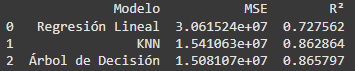

#### **y = log_price**


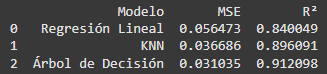

# Conclusión



## 7) Interpretación de Resultados:

- Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
- Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

### En el caso de y = price

Árbol de Decisión es el mejor modelo porque tiene el MSE más bajo y el R² más alto. Esto indica que realiza predicciones más precisas y explica mejor la relación entre las variables.

Si el objetivo fuera que al predecir el precio se minimice el error de predicción, este modelo debería ser la elección principal.



### En el caso de y = log_price

Árbol de Decisión sigue siendo el mejor modelo:

Tiene el MSE más bajo (0.0310), lo que significa que predice con mayor precisión.
Su R² más alto (0.9121) indica que explica la mayor parte de la variabilidad en los datos.

Por su parte KNN es una alternativa sólida:

Tiene un MSE bajo (0.0367) y un R² elevado (0.8961), muy cerca del Árbol de Decisión.
Puede ser más adecuado si se busca por ejemplo simplicidad en la implementación

Finalmente la Regresión Lineal:

Aunque es el modelo más sencillo y fácil de interpretar, tiene un MSE más alto y un R² menor en comparación con los otros dos modelos. Por tanto, es la opción menos efectiva.

Aunque, cabe resaltar que, los valores de R² tan cercanos al 0.9 podrían ser delicados de manejar, debido al sobre ajuste

Finalmente,

Parece más viable trabajar con y = log_price, si bien es una transformación, realizar una operación para interpretar o reinterpretar alguna predicción con datos nuevos es fácil y rápido

# Tareas Adicionales y Desafíos


## 8) Desafíos Adicionales:

- **Optimización de Modelos:** Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
- **Feature Engineering:** Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
- **Validación Cruzada:** Implementar validación cruzada para evaluar la estabilidad de los modelos.

Por cuestiones de tiempo, se me dificulta realizar este tipo de desarios adicionales, pero los tendré en cuenta para cuando pueda realizarlo con mejor conexión o con más comodidad

**Nota:** Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.



PD: Dejo algunos links de como otras personas trabajaron con este dataset, algunos bastante interesante en la forma de analizar y visualizar pasos

https://www.kaggle.com/code/badr2211/ml-tutorial-eda-param-tuning-ridge-lasso

https://www.kaggle.com/code/jrbeast2003/linear-regression-from-scratch

https://www.kaggle.com/code/omendrapy/automobile-data-analysis

https://www.kaggle.com/code/utkarshsaxenadn/data-correlation-with-pandas

https://www.kaggle.com/code/samehanasr/cars-classification

